<a href="https://colab.research.google.com/github/iljimae13/CobaPaper/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

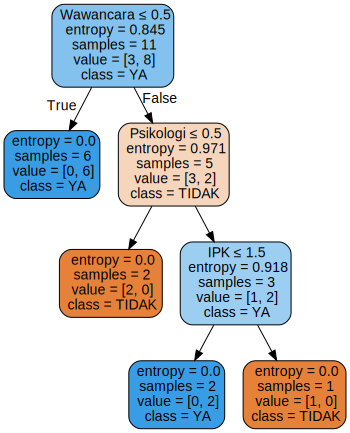

In [ ]:
# Instal library yang dibutuhkan
!pip install graphviz --quiet
!apt-get install -y graphviz > /dev/null

# Impor pustaka
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import graphviz

# Dataset pelamar
data = {
    'IPK': ['Bagus', 'Bagus', 'Bagus', 'Bagus', 'Cukup', 'Cukup', 'Cukup', 'Cukup', 'Kurang', 'Kurang', 'Kurang'],
    'Psikologi': ['Tinggi', 'Sedang', 'Sedang', 'Rendah', 'Tinggi', 'Sedang', 'Sedang', 'Rendah', 'Tinggi', 'Sedang', 'Rendah'],
    'Wawancara': ['Baik', 'Baik', 'Buruk', 'Buruk', 'Baik', 'Baik', 'Buruk', 'Buruk', 'Baik', 'Buruk', 'Baik'],
    'Diterima': ['YA', 'YA', 'YA', 'TIDAK', 'YA', 'YA', 'YA', 'TIDAK', 'YA', 'TIDAK', 'YA']
}

df = pd.DataFrame(data)

# Encode label string menjadi numerik
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Pisahkan fitur dan target
X = df[['IPK', 'Psikologi', 'Wawancara']]
y = df['Diterima']

# Buat model pohon keputusan ID3
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Visualisasi decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['IPK', 'Psikologi', 'Wawancara'],
                                class_names=label_encoders['Diterima'].classes_,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("id3_tree", format='png', cleanup=True)  # Simpan sebagai file PNG
graph  # Tampilkan langsung di notebook
